**Simple Linear Regreesion**


> $y = m.x + c = \beta_0 + \beta_1 X$ \\
> $\beta_1 = \dfrac{\sum_{i=0}^n (x_i-\bar{x}) (y_i-\bar{y})}{\sum_{i=0}^n (x_i-\bar{x})^2}$ \\
> $\beta_0 = \bar{y}-\beta_1 \times \bar{x}$






In [2]:
import numpy as np

def hypothesis(x, coef, inter):
  y = np.add(np.multiply(x, coef), inter)
  return y


In [3]:
def compute_inter(beta_1, x, y):
  x_avg = np.average(x)
  y_avg = np.average(y)

  beta_zero =  y_avg - np.multiply(beta_1, x_avg)
  return beta_zero

In [4]:
def compute_coef(x, y):
  x_avg = np.average(x)
  y_avg = np.average(y)

  numerator, denominator = 0, 0

  for i in range(len(x)):
    x_value = x[i]
    y_value = y[i]

    numerator += (x_value - x_avg) * (y_value - y_avg)
    denominator += (x_value - x_avg)**2

  return numerator/denominator



In [5]:
def R2_score(y_true, y_pred):
  y_average = np.average(y_true)

  residual_SS, total_SS = 0, 0

  for i in range(len(y_true)):
    residual_SS += (y_true[i] - y_pred[i])**2
    total_SS += (y_true[i] - y_average)**2
  
  return 1- residual_SS/total_SS



In [6]:
class SimpleLR():
  def __init__(self):
    self.intercept = 0
    self.coefficient = 0

  def predict(self, x):
    y = np.add(np.multiply(x, self.coefficient), self.intercept)
    return y

  def fit(self, x, y):
    self.intercept = self.compute_inter(x, y)
    self.coefficient = self.compute_coef(x, y)

    prediction = self.predict(x)
    return self.R2_score(y, prediction), prediction
  
  def compute_coef(self, x, y):
    x_avg = np.average(x)
    y_avg = np.average(y)

    numerator, denominator = 0, 0

    for i in range(len(x)):
      x_value = x[i]
      y_value = y[i]

      numerator += (x_value - x_avg) * (y_value - y_avg)
      denominator += (x_value - x_avg)**2

    return numerator/denominator

  
  def compute_inter(self, x, y):
    x_avg = np.average(x)
    y_avg = np.average(y)

    beta_zero =  y_avg - np.multiply(self.coefficient, x_avg)
    return beta_zero
  

  def R2_score(self, y_true, y_pred):
    y_average = np.average(y_true)
    residual_SS, total_SS = 0, 0

    for i in range(len(y_true)):
      residual_SS += (y_true[i] - y_pred[i])**2
      total_SS += (y_true[i] - y_average)**2
    
    return 1- residual_SS/total_SS
  

In [23]:
from sklearn.datasets import load_boston

AttributeError: 'function' object has no attribute 'head'

In [8]:
X, y = load_boston(return_X_y=True)

In [9]:
print(X.shape)

(506, 13)


In [21]:
X_train = X[:,0]
Y_train = y


[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 0.0000e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 0.0000e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 0.0000e+00]]


In [14]:
SLR = SimpleLR()

In [15]:
r2Score, pred = SLR.fit(X_train, Y_train)

In [16]:
print(r2Score)

0.12411722012452431


In [17]:
print(pred.shape)
print(Y_train.shape)

(506,)
(506,)


In [18]:
r2_score = SLR.R2_score(Y_train, pred)
print(r2_score)

0.12411722012452431


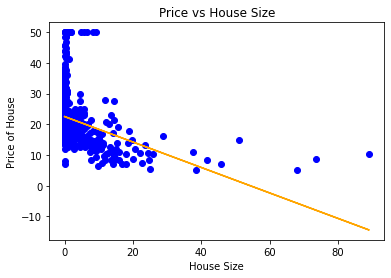

In [20]:
import matplotlib.pyplot as plt

plt.scatter( X_train, y, color = 'blue' )

plt.plot( X_train, pred, color = 'orange' )
  
plt.title( 'Price vs House Size' )
  
plt.xlabel( 'House Size' )
  
plt.ylabel( 'Price of House' )
  
plt.show()